In [ ]:
!pip install ecmwflibs
!pip install eccodes
!pip install cfgrib
!pip install xarray

In [5]:
!pip install cartopy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 35.8 MB/s eta 0:00:00


Import modules

In [16]:
import xarray as xr
import matplotlib.pyplot as plt
from datetime import datetime
import cartopy.crs as ccrs
%matplotlib inline

Define some variables needed for the script.

In [125]:
members = [
    "gec00", "gep01", "gep02", "gep03", "gep04", "gep05",
    "gep06", "gep07", "gep08", "gep09", "gep10",
    "gep11", "gep12", "gep13", "gep14", "gep15",
    "gep16", "gep17", "gep18", "gep19", "gep20",
    "gep21", "gep22", "gep23", "gep24", "gep25",
    "gep26", "gep27", "gep28", "gep29", "gep30"
]
# ftimes = ["{:03d}".format(i) for i in range(0, 9, 3)]  # forecast times
ftime = "003"
init_date = datetime(2023, 11, 30, 12)  # model initial time, year month date hour
local_dir = f"mslp/{init_date:%Y%m%d%H}"

['000', '003', '006']

From this part we are going to see the data and make sample plot

In [123]:
member = "gep01" # Change the member if needed
filename = f"{member}.t{init_date:%H}z.pgrb2s.0p25.f{ftime}.grb2"
ds = xr.open_dataset(f"{local_dir}/{filename}",engine="cfgrib")
ds

<xarray.Dataset>
Dimensions:     (latitude: 201, longitude: 225)
Coordinates:
    number      int64 ...
    time        datetime64[ns] ...
    step        timedelta64[ns] ...
    meanSea     float64 ...
  * latitude    (latitude) float64 -25.0 -24.75 -24.5 -24.25 ... 24.5 24.75 25.0
  * longitude   (longitude) float64 94.0 94.25 94.5 94.75 ... 149.5 149.8 150.0
    valid_time  datetime64[ns] ...
Data variables:
    prmsl       (latitude, longitude) float32 ...
Attributes:
    GRIB_edition:            2
    GRIB_centre:             kwbc
    GRIB_centreDescription:  US National Weather Service - NCEP
    GRIB_subCentre:          2
    Conventions:             CF-1.7
    institution:             US National Weather Service - NCEP
    history:                 2023-12-01T19:23 GRIB to CDM+CF via cfgrib-0.9.1...

Because the file only contain MSLP variable, then we only have one variable inside it. See that prmsl unit is in Pascal. We are going to convert it to hPa by dividing it by 100.
We also need to take latitude and longitude information.

In [124]:
data = ds["prmsl"]/100
lons = ds.longitude.values
lats = ds.latitude.values

Now we can start to design the plot.

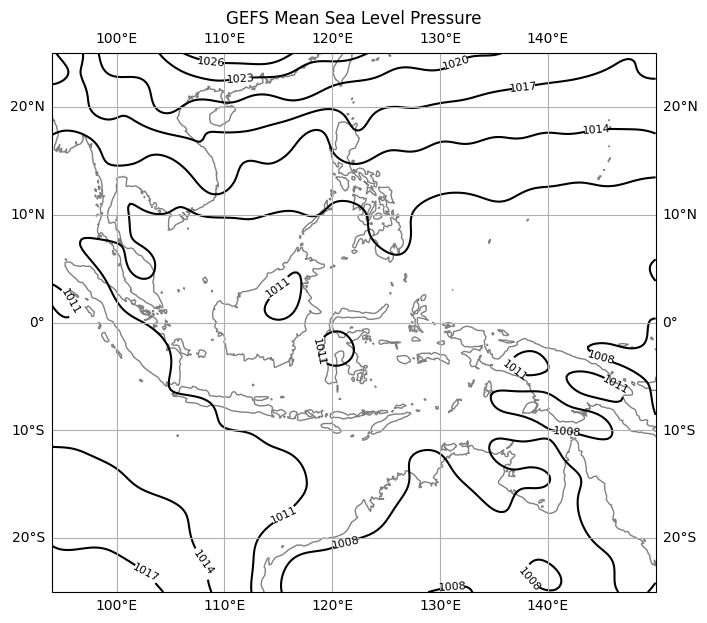

In [122]:
# Initiate figure and axes instance
fig, ax = plt.subplots(1, 1, figsize=(13, 7), subplot_kw={'projection': ccrs.PlateCarree()})

# Plot the data as contour
contour = ax.contour(lons, lats, data, transform=ccrs.PlateCarree(), colors='black')

# Add contour labels
ax.clabel(contour, inline=True, fontsize=8)

# Add coastlines
ax.coastlines(color='gray', edgecolor='gray')

# Add titles
ax.set_title('GEFS Mean Sea Level Pressure')

# Add gridlines and labels
ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)
ax.set_xlabel('Longitude',fontsize=5)
ax.set_ylabel('Latitude',fontsize=5)

# Save the image
plt.savefig("test_result.png")

Once you are happy with the design, we need to incorporate the codes into one block, and loops through the members.

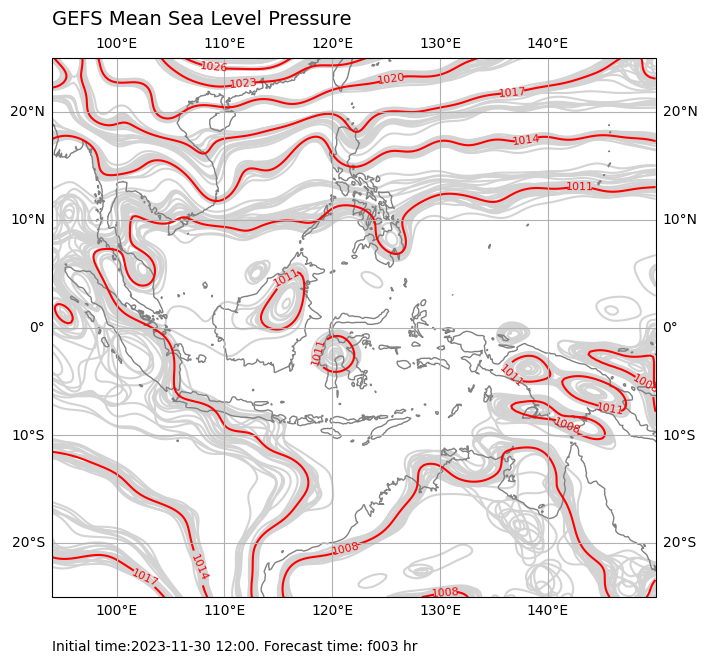

In [117]:
fig, ax = plt.subplots(1, 1, figsize=(13, 7), subplot_kw={'projection': ccrs.PlateCarree()})
# Loop through member
for member in members:
  filename = f"{member}.t{init_date:%H}z.pgrb2s.0p25.f{ftime}.grb2"
  ds = xr.open_dataset(f"{local_dir}/{filename}",engine="cfgrib")
  data = ds["prmsl"]/100
  lons = ds.longitude.values
  lats = ds.latitude.values

  # Make the control run contour red
  if member == "gec00":
    contour = ax.contour(lons, lats, data, transform=ccrs.PlateCarree(), colors='red',zorder=2)
    # Add contour labels
    ax.clabel(contour, inline=True, fontsize=8)
  else:
    contour = ax.contour(lons, lats, data, transform=ccrs.PlateCarree(), colors='lightgray',zorder=1)

# Add coastlines
ax.coastlines(color='gray', edgecolor='gray')

# Add titles
title = ax.set_title('GEFS Mean Sea Level Pressure',x=0, y=1.0, pad=24, fontsize=14, ha="left")

# Add information text
ax.text(0, -0.1, f"Initial time:{init_date:%Y-%m-%d %H:%M}. Forecast time: +{ftime} hr", transform=ax.transAxes, fontsize=10, ha="left")

# Add gridlines and labels
ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
plt.savefig(f"mslp_{init_date:%Y%m%d%H}_{ftime}.png",dpi=200,bbox_inches='tight')

<Figure size 640x480 with 0 Axes>

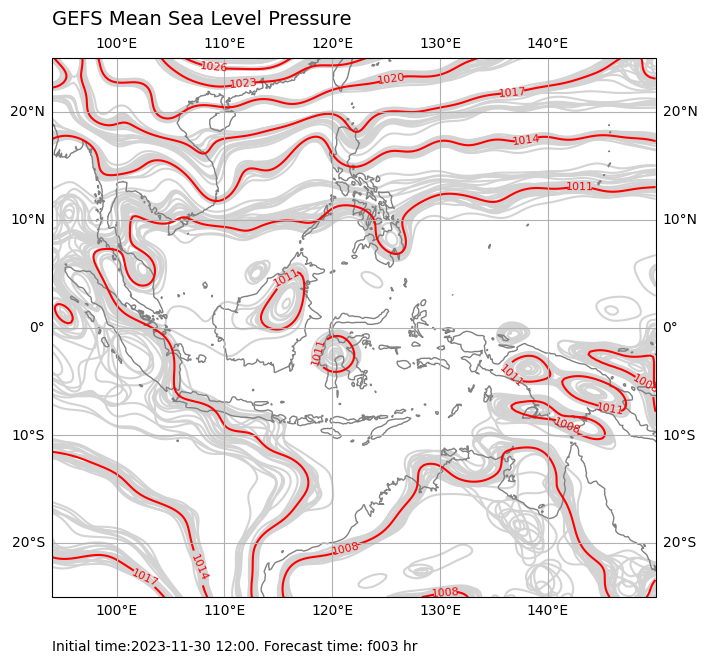

In [108]:
fig

<Figure size 640x480 with 0 Axes>